#Forest Cover Type Classification

**Author** : Rammya Dharshini K

LMG-Soc'21 Participant

Donload dataset from [here](https://www.kaggle.com/uciml/forest-cover-type-dataset)

###Importing Required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###Load the Data

In [2]:
data = pd.read_csv('/content/covtype.csv')
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


###Analyse the data

In [3]:
data.shape

(581012, 55)

In [4]:
data.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [5]:
data.corr

<bound method DataFrame.corr of         Elevation  Aspect  Slope  ...  Soil_Type39  Soil_Type40  Cover_Type
0            2596      51      3  ...            0            0           5
1            2590      56      2  ...            0            0           5
2            2804     139      9  ...            0            0           2
3            2785     155     18  ...            0            0           2
4            2595      45      2  ...            0            0           5
...           ...     ...    ...  ...          ...          ...         ...
581007       2396     153     20  ...            0            0           3
581008       2391     152     19  ...            0            0           3
581009       2386     159     17  ...            0            0           3
581010       2384     170     15  ...            0            0           3
581011       2383     165     13  ...            0            0           3

[581012 rows x 55 columns]>

In [6]:
data.index

RangeIndex(start=0, stop=581012, step=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [8]:
data.count()

Elevation                             581012
Aspect                                581012
Slope                                 581012
Horizontal_Distance_To_Hydrology      581012
Vertical_Distance_To_Hydrology        581012
Horizontal_Distance_To_Roadways       581012
Hillshade_9am                         581012
Hillshade_Noon                        581012
Hillshade_3pm                         581012
Horizontal_Distance_To_Fire_Points    581012
Wilderness_Area1                      581012
Wilderness_Area2                      581012
Wilderness_Area3                      581012
Wilderness_Area4                      581012
Soil_Type1                            581012
Soil_Type2                            581012
Soil_Type3                            581012
Soil_Type4                            581012
Soil_Type5                            581012
Soil_Type6                            581012
Soil_Type7                            581012
Soil_Type8                            581012
Soil_Type9

In [9]:
data['Cover_Type'].nunique()

7

In [10]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [11]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

###Explore through Seaborn Module

In [12]:
import seaborn as sns

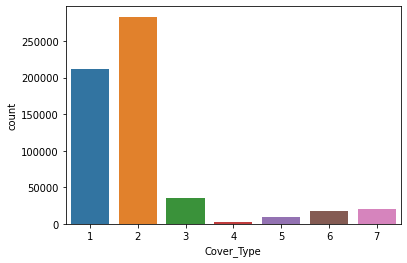

In [13]:
sns.countplot(x=data['Cover_Type'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


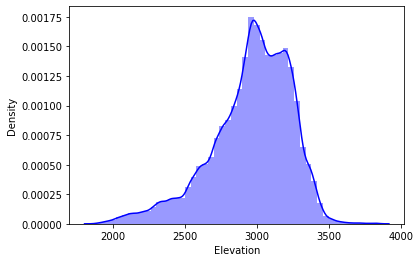

In [14]:
sns.distplot(data['Elevation'] , color = 'blue')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


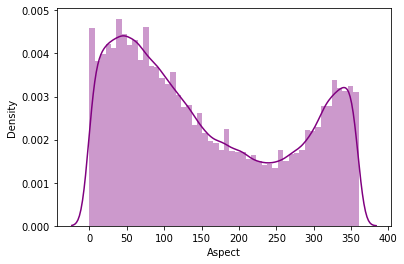

In [15]:
sns.distplot(data['Aspect'] , color = 'purple')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


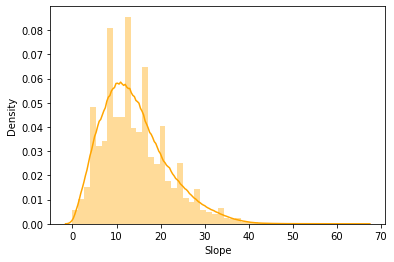

In [16]:
sns.distplot(data['Slope'] , color = 'orange')

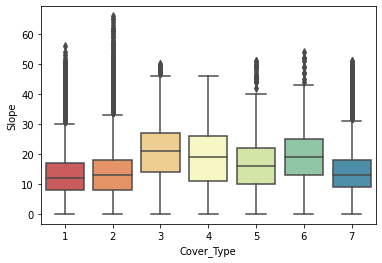

In [17]:
sns.boxplot(x = 'Cover_Type' , y = 'Slope' , data = data , palette = 'Spectral')

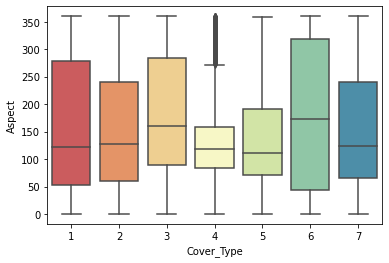

In [18]:
sns.boxplot(x = 'Cover_Type' , y = 'Aspect' , data = data , palette = 'Spectral')

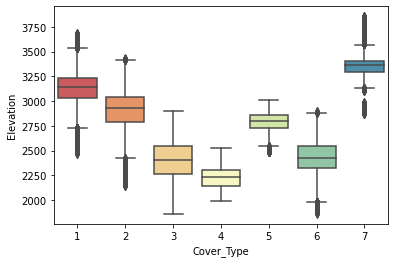

In [19]:
sns.boxplot(x = 'Cover_Type' , y = 'Elevation' , data = data , palette = 'Spectral')

In [20]:
data.corrwith(data['Cover_Type']).sort_values()

Elevation                            -0.269554
Wilderness_Area1                     -0.203913
Horizontal_Distance_To_Roadways      -0.153450
Soil_Type22                          -0.141746
Soil_Type23                          -0.135055
Soil_Type29                          -0.124933
Horizontal_Distance_To_Fire_Points   -0.108936
Hillshade_Noon                       -0.096426
Soil_Type32                          -0.075562
Soil_Type24                          -0.068746
Soil_Type31                          -0.065347
Soil_Type33                          -0.062502
Hillshade_3pm                        -0.048290
Wilderness_Area2                     -0.048059
Soil_Type19                          -0.036452
Hillshade_9am                        -0.035415
Soil_Type20                          -0.028665
Soil_Type21                          -0.025400
Soil_Type12                          -0.023601
Horizontal_Distance_To_Hydrology     -0.020317
Soil_Type27                          -0.014407
Soil_Type30  

In [21]:
data.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,0.131838,0.238164,0.066550,-0.619374,-0.204512,-0.187677,-0.182463,-0.183521,-0.150376,-0.214606,-0.002252,-0.003021,-0.060915,-0.428746,-0.134227,-0.118905,-0.043984,-0.080825,-0.007153,-0.059446,-0.111028,-0.081811,0.033144,-0.043128,0.017557,0.158959,0.124356,0.053582,0.028753,-0.016657,0.035254,-0.029270,0.074327,-0.026667,0.070405,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,-0.140123,0.055988,0.074904,0.082687,-0.007574,-0.005649,-0.002730,0.017212,0.008938,0.010766,-0.005052,-0.003366,-0.020800,0.049835,-0.064344,-0.070209,0.054544,0.007597,-0.002660,0.007846,-0.000168,-0.028353,-0.003635,-0.029440,0.032998,0.021578,0.013676,0.018164,-0.003265,-0.010661,0.011328,0.027535,-0.062181,-0.028922,0.001763,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,-0.234576,-0.036253,0.125663,0.255503,0.107847,-0.018553,0.125497,0.131847,0.072311,0.003673,-0.015661,-0.023359,-0.032752,0.244037,-0.050894,-0.169300,0.192423,0.000228,0.001081,-0.034791,-0.040208,-0.045851,-0.083743,-0.077582,-0.025461,-0.053396,-0.207397,0.082434,0.026364,-0.021449,0.043695,0.067052,-0.082941,0.075864,-0.034610,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,-0.097124,0.055726,0.122028,-0.100433,-0.035096,-0.011569,-0.041211,-0.049071,-0.009370,-0.012916,0.004751,-0.000795,-0.021935,-0.071653,0.001399,0.014628,-0.002032,-0.038478,-0.002667,-0.067448,-0.071435,-0.013340,-0.043236,-0.078088,-0.039953,-0.051424,-0.132244,0.021927,0.016099,0.013408,0.052384,0.026210,-0.001025,-0.049960,0.073658,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,-0.180710,-0.008709,0.146839,0.077792,0.015275,0.008954,0.008863,0.025066,0.026772,0.046259,-0.008485,-0.012915,-0.028476,0.055154,-0.020870,-0.044526,0.083482,-0.024281,-0.001744,-0.050909,-0.054191,-0.031692,-0.055635,-0.076727,-0.026116,-0.075679,-0.180098,0.037066,-0.013471,-0.011212,0.067086,0.071672,-0.075860,-0.011901,0.033609,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,0.453913,-0.200411,-0.232933,-0.270349,-0.083585,-0.088026,-0.084988,-0.088524,-0.061607,-0.108328,0.020107,0.025805,-0.045813,-0.182955,-0.099293,0.054196,-0.054968,-0.033945,-0.003144,0.018083,-0.051825,-0.051243,0.068758,0.056595,-0.014890,0.046979,-0.007067,-0.032451,-0.034842,0.002521,0.003866,-0.032749,0.306324,0.077091,-0.058840,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450

In [22]:
data.corrwith(data['Cover_Type']).sort_values()

Elevation                            -0.269554
Wilderness_Area1                     -0.203913
Horizontal_Distance_To_Roadways      -0.153450
Soil_Type22                          -0.141746
Soil_Type23                          -0.135055
Soil_Type29                          -0.124933
Horizontal_Distance_To_Fire_Points   -0.108936
Hillshade_Noon                       -0.096426
Soil_Type32                          -0.075562
Soil_Type24                          -0.068746
Soil_Type31                          -0.065347
Soil_Type33                          -0.062502
Hillshade_3pm                        -0.048290
Wilderness_Area2                     -0.048059
Soil_Type19                          -0.036452
Hillshade_9am                        -0.035415
Soil_Type20                          -0.028665
Soil_Type21                          -0.025400
Soil_Type12                          -0.023601
Horizontal_Distance_To_Hydrology     -0.020317
Soil_Type27                          -0.014407
Soil_Type30  

###Heat-Map Visualization

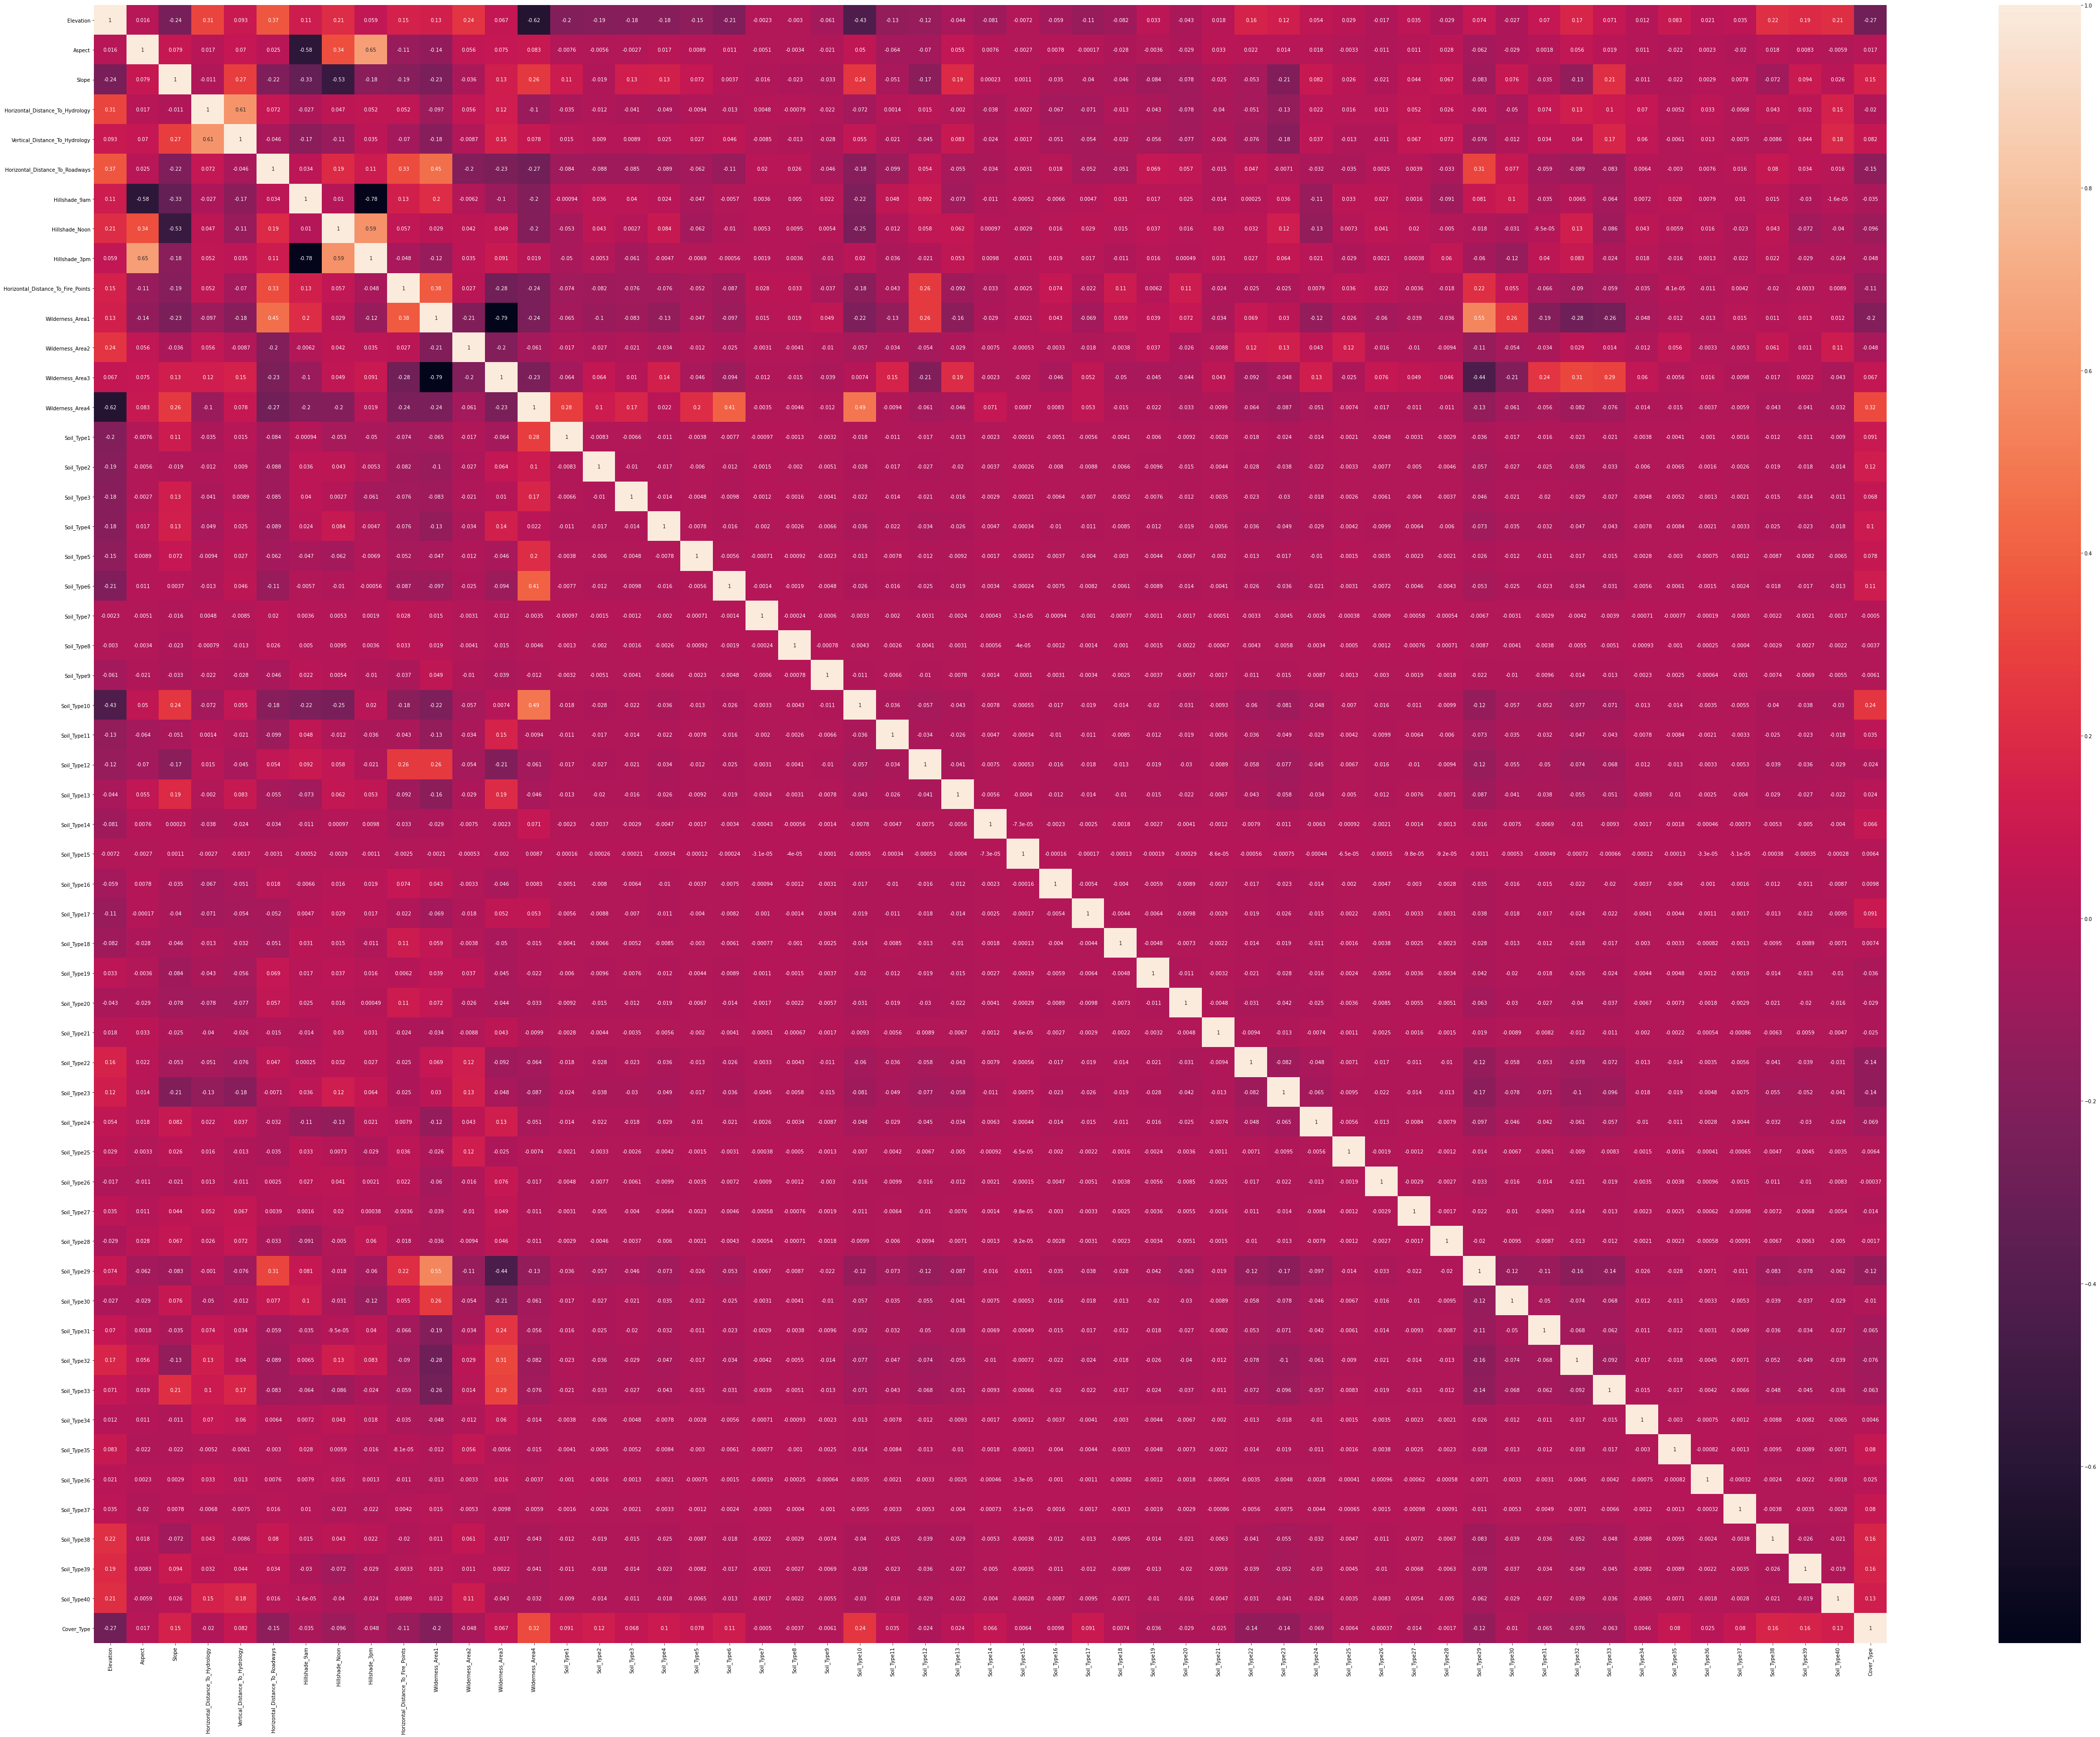

In [23]:
plt.figure(figsize=(80,60))
sns.heatmap(data=data.corr(), annot=True)

###Model -1 : Logistic Regression

In [24]:
data = data.fillna(0)

In [25]:
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']

In [26]:
X.shape

(581012, 54)

In [27]:
print(X)

        Elevation  Aspect  Slope  ...  Soil_Type38  Soil_Type39  Soil_Type40
0            2596      51      3  ...            0            0            0
1            2590      56      2  ...            0            0            0
2            2804     139      9  ...            0            0            0
3            2785     155     18  ...            0            0            0
4            2595      45      2  ...            0            0            0
...           ...     ...    ...  ...          ...          ...          ...
581007       2396     153     20  ...            0            0            0
581008       2391     152     19  ...            0            0            0
581009       2386     159     17  ...            0            0            0
581010       2384     170     15  ...            0            0            0
581011       2383     165     13  ...            0            0            0

[581012 rows x 54 columns]


In [28]:
y.shape

(581012,)

In [29]:
print(y)

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int64


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
def split_and_scale(df):
    df = df.copy()
    
    y = df['Cover_Type']
    X = df.drop('Cover_Type', axis=1)
  
    X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, random_state=10)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [32]:
def evaluate_model(model, class_balance, X_test, y_test):
    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc * 100))

In [33]:
def prediction_model(model, class_balance, X_test, y_test):    
    y_pred = model.predict(X_test)
    
    c_matrix = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)  

    plt.figure(figsize=(8, 8))
    sns.heatmap(c_matrix, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title("Confusion Matrix")
    plt.show()

    print("Classification Report:\n", clr)

In [34]:
X_train, X_test, y_train, y_test = split_and_scale(data)
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
evaluate_model(model, "Data - Imbalance DataSet", X_test, y_test)

Accuracy (Data - Imbalance DataSet): 72.53%


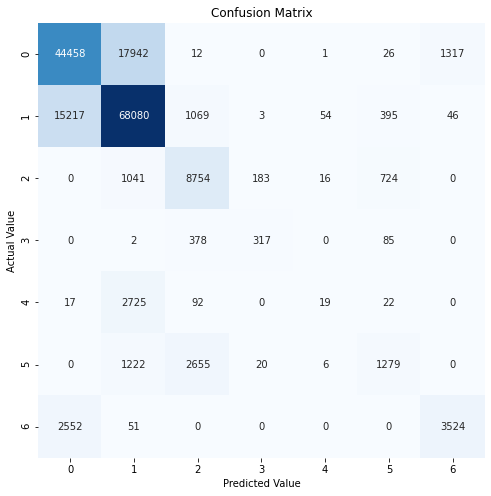

Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.70      0.71     63756
           2       0.75      0.80      0.77     84864
           3       0.68      0.82      0.74     10718
           4       0.61      0.41      0.49       782
           5       0.20      0.01      0.01      2875
           6       0.51      0.25      0.33      5182
           7       0.72      0.58      0.64      6127

    accuracy                           0.73    174304
   macro avg       0.60      0.51      0.53    174304
weighted avg       0.71      0.73      0.72    174304



In [36]:
prediction_model(model, "Data", X_test, y_test)

###Model - 2 : Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
random = RandomForestClassifier()

In [39]:
random.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
random.score(X_test,y_test)

0.9528983844317973

In [41]:
from sklearn.metrics import classification_report

In [42]:
y_pred = random.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63756
           2       0.95      0.97      0.96     84864
           3       0.94      0.96      0.95     10718
           4       0.91      0.87      0.89       782
           5       0.94      0.77      0.84      2875
           6       0.93      0.90      0.91      5182
           7       0.97      0.94      0.96      6127

    accuracy                           0.95    174304
   macro avg       0.94      0.91      0.92    174304
weighted avg       0.95      0.95      0.95    174304



### Model - 3:

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# Set X and y variables to the .values of features and labels
X = data.drop('Cover_Type', axis=1).values
y = data['Cover_Type'].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

class_names = ['Spruce/Fir', 'Lodgepole Pine',
                   'Ponderosa Pine', 'Cottonwood/Willow',
                   'Aspen', 'Douglas-fir', 'Krummholz']

In [49]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout, InputLayer
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam

In [51]:
model = Sequential()
#input layer
model.add(InputLayer(input_shape=(X_train.shape[1],)))

#hidden layer
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.3))
#hidden layer
#model.add(Dense(39, activation='relu'))
#model.add(Dropout(0.3))
# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(7, activation='softmax'))

# compile model
opt = Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stop = EarlyStopping(monitor='val_accuracy',verbose=0, patience=3)

In [ ]:
# !pip install tensorflow==2.0.0

In [55]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=1024, callbacks=[early_stop])

Train on 435759 samples, validate on 145253 samples
Epoch 1/100
435759/435759 [==============================] - 5s 10us/sample - loss: 0.9185 - accuracy: 0.6138 - val_loss: 0.7013 - val_accuracy: 0.7026
Epoch 2/100
435759/435759 [==============================] - 4s 8us/sample - loss: 0.7166 - accuracy: 0.7009 - val_loss: 0.6445 - val_accuracy: 0.7301
Epoch 3/100
435759/435759 [==============================] - 4s 8us/sample - loss: 0.6748 - accuracy: 0.7200 - val_loss: 0.6192 - val_accuracy: 0.7363
Epoch 4/100
435759/435759 [==============================] - 3s 8us/sample - loss: 0.6536 - accuracy: 0.7282 - val_loss: 0.6031 - val_accuracy: 0.7417
Epoch 5/100
435759/435759 [==============================] - 4s 8us/sample - loss: 0.6388 - accuracy: 0.7340 - val_loss: 0.5897 - val_accuracy: 0.7478
Epoch 6/100
435759/435759 [==============================] - 4s 8us/sample - loss: 0.6255 - accuracy: 0.7389 - val_loss: 0.5764 - val_accuracy: 0.7553
Epoch 7/100
435759/435759 [==============

In [56]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot

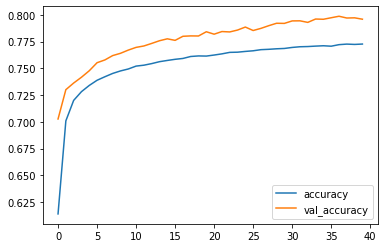

In [57]:
losses[['accuracy','val_accuracy']].plot()

In [58]:
model.metrics_names
score = model.evaluate(X_test,y_test, verbose=0)
print(score[0])
print(score[1])

0.46733742714097287
0.796018


In [59]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(X_test)

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79     52943
           1       0.81      0.84      0.83     70897
           2       0.75      0.88      0.81      8890
           3       0.86      0.53      0.65       704
           4       0.79      0.14      0.23      2340
           5       0.67      0.44      0.53      4384
           6       0.84      0.78      0.81      5095

    accuracy                           0.80    145253
   macro avg       0.79      0.63      0.66    145253
weighted avg       0.80      0.80      0.79    145253

